<a href="https://colab.research.google.com/github/erick-arango/Proyecto_Introduccion_IA/blob/main/04_modelo_con_preprocesado_de_otra_forma_y_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# =========================================================
# 04 - Modelo alternativo: Random Forest
# UDEA AI4ENG 2025-2 – Pruebas Saber Pro Colombia
# Autor: Erick Arango
# =========================================================

import os
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 200)

print("Notebook cargado correctamente.")


Notebook cargado correctamente.


In [ ]:
# =========================================================
# 1. Cargar dataset limpio
# =========================================================

if not os.path.exists("train_clean.csv"):
    raise FileNotFoundError("train_clean.csv no encontrado. Ejecuta antes el notebook 02.")

train = pd.read_csv("train_clean.csv")
print("train_clean.csv cargado. Shape:", train.shape)

train.head()


train_clean.csv cargado. Shape: (692500, 70)


,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4,E_VALORMATRICULAUNIVERSIDAD_num,E_VALORMATRICULAUNIVERSIDAD_Entre 1 millón y menos de 2.5 millones,E_VALORMATRICULAUNIVERSIDAD_Entre 2.5 millones y menos de 4 millones,E_VALORMATRICULAUNIVERSIDAD_Entre 4 millones y menos de 5.5 millones,E_VALORMATRICULAUNIVERSIDAD_Entre 5.5 millones y menos de 7 millones,E_VALORMATRICULAUNIVERSIDAD_Entre 500 mil y menos de 1 millón,E_VALORMATRICULAUNIVERSIDAD_Menos de 500 mil,E_VALORMATRICULAUNIVERSIDAD_Más de 7 millones,E_VALORMATRICULAUNIVERSIDAD_No pagó matrícula,E_VALORMATRICULAUNIVERSIDAD_no info,E_HORASSEMANATRABAJA_0,E_HORASSEMANATRABAJA_Entre 11 y 20 horas,E_HORASSEMANATRABAJA_Entre 21 y 30 horas,E_HORASSEMANATRABAJA_Menos de 10 horas,E_HORASSEMANATRABAJA_Más de 30 horas,F_ESTRATOVIVIENDA_Estrato 1,F_ESTRATOVIVIENDA_Estrato 2,F_ESTRATOVIVIENDA_Estrato 3,F_ESTRATOVIVIENDA_Estrato 4,F_ESTRATOVIVIENDA_Estrato 5,F_ESTRATOVIVIENDA_Estrato 6,F_ESTRATOVIVIENDA_Sin Estrato,F_TIENEINTERNET_No,F_TIENEINTERNET_Si,F_EDUCACIONPADRE_Educación profesional completa,F_EDUCACIONPADRE_Educación profesional incompleta,F_EDUCACIONPADRE_Ninguno,F_EDUCACIONPADRE_Postgrado,F_EDUCACIONPADRE_Primaria completa,F_EDUCACIONPADRE_Primaria incompleta,F_EDUCACIONPADRE_Secundaria (Bachillerato) completa,F_EDUCACIONPADRE_Secundaria (Bachillerato) incompleta,F_EDUCACIONPADRE_Técnica o tecnológica completa,F_EDUCACIONPADRE_Técnica o tecnológica incompleta,F_EDUCACIONPADRE_no info,F_TIENELAVADORA_No,F_TIENELAVADORA_Si,F_TIENEAUTOMOVIL_No,F_TIENEAUTOMOVIL_Si,E_PRIVADO_LIBERTAD_N,E_PRIVADO_LIBERTAD_S,E_PAGOMATRICULAPROPIO_No,E_PAGOMATRICULAPROPIO_Si,F_TIENECOMPUTADOR_No,F_TIENECOMPUTADOR_Si,F_TIENEINTERNET.1_No,F_TIENEINTERNET.1_Si,F_EDUCACIONMADRE_Educación profesional completa,F_EDUCACIONMADRE_Educación profesional incompleta,F_EDUCACIONMADRE_Ninguno,F_EDUCACIONMADRE_Postgrado,F_EDUCACIONMADRE_Primaria completa,F_EDUCACIONMADRE_Primaria incompleta,F_EDUCACIONMADRE_Secundaria (Bachillerato) completa,F_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,F_EDUCACIONMADRE_Técnica o tecnológica completa,F_EDUCACIONMADRE_Técnica o tecnológica incompleta,F_EDUCACIONMADRE_no info,RENDIMIENTO_GLOBAL_alto,RENDIMIENTO_GLOBAL_bajo,RENDIMIENTO_GLOBAL_medio-alto,RENDIMIENTO_GLOBAL_medio-bajo
0,0.914049,0.966667,0.316790,0.133333,0.490107,0.427105,0.968750,0.804217,0.828571,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.652244,0.966667,0.262936,0.100000,0.473364,0.441478,0.912500,0.795181,0.485714,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.311706,0.666667,0.864836,0.133333,0.452055,0.439425,0.953125,0.795181,0.485714,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.475446,0.400000,0.014784,0.866667,0.738204,0.353183,0.787500,0.572289,0.657143,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.999743,0.966667,0.957761,0.033333,0.480974,0.476386,0.890625,0.885542,0.485714,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# =========================================================
# 2. Reconstruir variable objetivo desde columnas dummy
# =========================================================

target_cols = [
    "RENDIMIENTO_GLOBAL_alto",
    "RENDIMIENTO_GLOBAL_medio-alto",
    "RENDIMIENTO_GLOBAL_medio-bajo",
    "RENDIMIENTO_GLOBAL_bajo"
]

print("Columnas objetivo encontradas:", target_cols)

# 2.1 Eliminar filas donde las dummies del target son NaN
print("Filas con NaN en columnas del target:", train[target_cols].isna().any(axis=1).sum())

train = train.dropna(subset=target_cols).reset_index(drop=True)

print("Nuevo shape tras eliminar filas corruptas:", train.shape)

# 2.2 Construir TARGET
mapa = {
    "RENDIMIENTO_GLOBAL_bajo": 0,
    "RENDIMIENTO_GLOBAL_medio-bajo": 1,
    "RENDIMIENTO_GLOBAL_medio-alto": 2,
    "RENDIMIENTO_GLOBAL_alto": 3
}

train["TARGET"] = train[target_cols].idxmax(axis=1).map(mapa)

print("NaN restantes en TARGET:", train["TARGET"].isna().sum())

# Variables finales
y = train["TARGET"]
X = train.drop(columns=target_cols + ["TARGET"])

print("X:", X.shape)
print("y:", y.shape)


Columnas objetivo encontradas: ['RENDIMIENTO_GLOBAL_alto', 'RENDIMIENTO_GLOBAL_medio-alto', 'RENDIMIENTO_GLOBAL_medio-bajo', 'RENDIMIENTO_GLOBAL_bajo']
Filas con NaN en columnas del target: 0
Nuevo shape tras eliminar filas corruptas: (692500, 70)
NaN restantes en TARGET: 0
X: (692500, 66)
y: (692500,)


In [ ]:
# =========================================================
# 3. Train-test split
# =========================================================

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Train:", X_train.shape)
print("Validation:", X_val.shape)


Train: (554000, 66)
Validation: (138500, 66)


In [ ]:
# =========================================================
# 4. Modelo alternativo: Random Forest
# =========================================================

rf = RandomForestClassifier(
    n_estimators=150,
    max_depth=18,
    min_samples_split=20,
    max_features="sqrt",
    n_jobs=-1,
    random_state=42
)

print("Entrenando Random Forest...")
rf.fit(X_train, y_train)

preds = rf.predict(X_val)

acc = accuracy_score(y_val, preds)
print("Accuracy validación:", acc)

print("\nClassification Report:")
print(classification_report(y_val, preds))


Entrenando Random Forest...
📌 Accuracy validación: 0.40774007220216607

📌 Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.54      0.48     34597
           1       0.32      0.25      0.28     34455
           2       0.31      0.23      0.26     34324
           3       0.50      0.60      0.55     35124

    accuracy                           0.41    138500
   macro avg       0.39      0.41      0.39    138500
weighted avg       0.39      0.41      0.39    138500



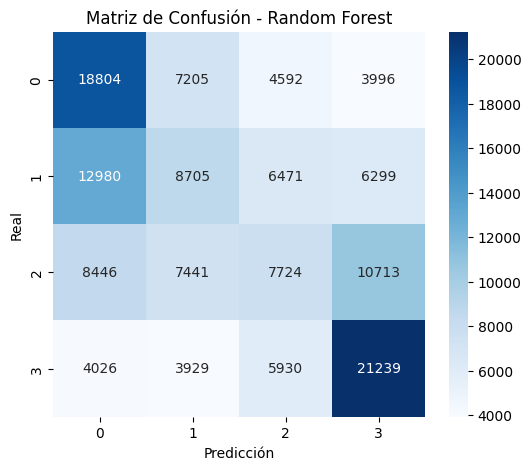

In [ ]:
cm = confusion_matrix(y_val, preds)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


In [ ]:
# =========================================================
# 5. Importancia de características
# =========================================================

importances = pd.DataFrame({
    "feature": X.columns,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False)

importances.head(15)


,feature,importance
8,E_VALORMATRICULAUNIVERSIDAD_num,0.097978
2,E_PRGM_ACADEMICO,0.087625
4,INDICADOR_1,0.076616
5,INDICADOR_2,0.061390
15,E_VALORMATRICULAUNIVERSIDAD_Más de 7 millones,0.056435
7,INDICADOR_4,0.051362
0,ID,0.048715
3,E_PRGM_DEPARTAMENTO,0.048193
6,INDICADOR_3,0.046786
9,E_VALORMATRICULAUNIVERSIDAD_Entre 1 millón y m...,0.038001


In [ ]:
# =========================================================
# 6. Entrenar modelo final con TODO el train_clean.csv
# =========================================================

rf_final = RandomForestClassifier(
    n_estimators=150,
    max_depth=18,
    min_samples_split=20,
    max_features="sqrt",
    n_jobs=-1,
    random_state=42
)

print("Entrenando modelo final...")
rf_final.fit(X, y)
print("Modelo final entrenado.")


Entrenando modelo final...
Modelo final entrenado.


In [ ]:
# =========================================================
# 7. Cargar test_clean.csv
# =========================================================

if not os.path.exists("test_clean.csv"):
    raise FileNotFoundError("Falta test_clean.csv. Debe generarse igual que train_clean.csv.")

test = pd.read_csv("test_clean.csv")
print("Test cargado:", test.shape)


Test cargado: (68885, 70)


In [ ]:
# =========================================================
# 8. Alinear columnas test/train
# =========================================================

missing_cols = set(X.columns) - set(test.columns)
for c in missing_cols:
    test[c] = 0  # cualquier categoría faltante = 0

test = test[X.columns]

print("Test alineado:", test.shape)


Test alineado: (68885, 66)


In [ ]:
# =========================================================
# 9. Generar submission para Kaggle
# =========================================================

preds_test = rf_final.predict(test)

inv_map = {0:"bajo", 1:"medio-bajo", 2:"medio-alto", 3:"alto"}
preds_text = [inv_map[p] for p in preds_test]

submission = pd.DataFrame({
    "ID": test["ID"],
    "RENDIMIENTO_GLOBAL": preds_text
})

submission.to_csv("submission_rf.csv", index=False)

print("Archivo submission_rf.csv generado con éxito.")
submission.head()


Archivo submission_rf.csv generado con éxito.


,ID,RENDIMIENTO_GLOBAL
0,550236,bajo
1,98545,alto
2,499179,alto
3,782980,bajo
4,785185,alto
